In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

sns.set(palette = 'muted', style = 'darkgrid')

In [3]:
with open('/Users/ishareef7/Springboard/Capstone1/Datasets/recs.pickle','rb') as handle:
    recs = pickle.load(handle)

In [4]:
with open('/Users/ishareef7/Springboard/Capstone1/Datasets/variable_map.pickle','rb') as handle:
    var_map = pickle.load(handle)

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


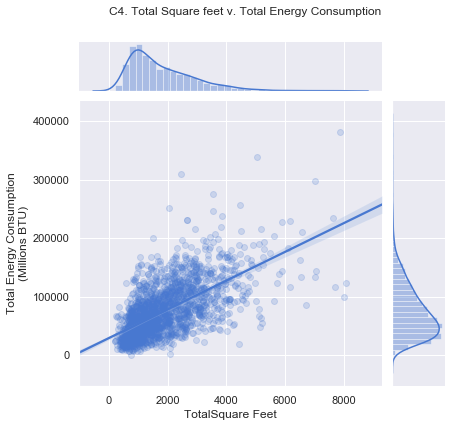

In [5]:
c4 = sns.jointplot(x = 'TOTSQFT_EN', y = 'TOTALBTU', kind = 'reg', data = recs , scatter_kws = {'alpha':0.2})
_ = c4.set_axis_labels('TotalSquare Feet','Total Energy Consumption\n(Millions BTU)')
_ = c4.fig.subplots_adjust(top=0.9)
_ = c4.fig.suptitle('C4. Total Square feet v. Total Energy Consumption')

## Fisher Transformation Z-Test : 
Significance test for the correlation between Total Sq. Feet and Energy Consumption

$H_{0}$ : $\rho$ = $0$  
$H_{a}$ : $\rho$ $\neq0$  
$\alpha = 0.05$

In [6]:
r = recs.corr().loc['TOTSQFT_EN', 'TOTALBTU']

In [7]:
#Calcute Fisher z transformation
r_f = np.arctanh(r)

#Calculate Fisher standard deviation and z score
s = ( 1/np.sqrt(len(recs) - 3 ) )
z = r/s

#Calculate p value
p = 1 - st.norm.cdf(z)
print('p value =', p )

p value = 0.0


In [8]:
#Calculate 95% CI for Fisher transformation
lo_f , hi_f = r_f - st.norm.ppf(.975)*s, r_f + st.norm.ppf(.975)*s

#Reverse transformation
lo , hi = np.tanh((lo_f,hi_f))

print((lo,hi))

(0.6205776122143206, 0.651524018043065)


## Conclusion

The p-value of the above z-test is less that than the significance level, thus we reject the null hypothesis that there is no correlation between total square feet of a household and total energy consumption in favor of the alternative hypothesis. This suggest that there is positive correlation between total square feet of a household and total energy consumption among all households

In [9]:
var_map['TYPEHUQ']

{'1': 'Mobile home',
 '2': 'Single-family detached house ',
 '3': 'Single-family attached house',
 '4': 'Apartment in a building with 2 to 4 units',
 '5': 'Apartment in a building with 5 or more units'}

In [10]:
#Get slices of dataset for each housegold type with relevant columns
recs['TOTALBTU'] = recs['TOTALBTU'].apply(lambda x: x/1e3)
mb = recs[recs['TYPEHUQ'] ==  1].loc[:,['TOTALBTU','TOTSQFT_EN']]
sfd = recs[recs['TYPEHUQ'] ==  2].loc[:,['TOTALBTU','TOTSQFT_EN']]
sfa = recs[recs['TYPEHUQ'] ==  3].loc[:,['TOTALBTU','TOTSQFT_EN']]
apt2 = recs[recs['TYPEHUQ'] ==  4].loc[:,['TOTALBTU','TOTSQFT_EN']]
apt5 = recs[recs['TYPEHUQ'] ==  5].loc[:,['TOTALBTU','TOTSQFT_EN']]
housing_types = [mb, sfd, sfa, apt2, apt5]

In [11]:
#Create list of pearson correlations between total square feet and total energy consumption for each houselhold type
correlations = [h.corr().iloc[1,0] for h in housing_types]
corr_pairs = dict(zip(var_map['TYPEHUQ'].values(), correlations))
corr_pairs

{'Mobile home': 0.1318991686216176,
 'Single-family detached house ': 0.5184788583132134,
 'Single-family attached house': 0.44685008460489,
 'Apartment in a building with 2 to 4 units': 0.455790170954691,
 'Apartment in a building with 5 or more units': 0.3519167535709333}

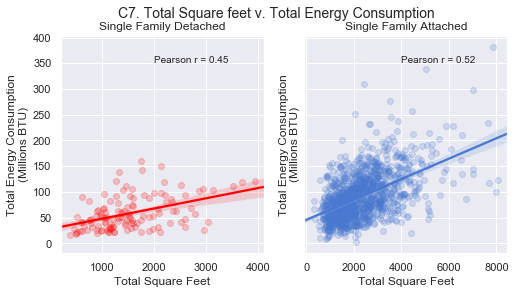

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,4))
c8 = sns.regplot(x = 'TOTSQFT_EN', y = 'TOTALBTU', data = sfa ,
                 scatter_kws = {'alpha':0.2}, color = 'red', ax = ax1)
_ = c8.set(xlabel = 'Total Square Feet', ylabel ='Total Energy Consumption\n(Millions BTU)')
_ = c8.set_title('Single Family Detached')
_ = c8.text(2000,350, 'Pearson r = {:03.2f}'.format(corr_pairs['Single-family attached house']))

c9 = sns.regplot(x = 'TOTSQFT_EN', y = 'TOTALBTU', data = sfd ,
                 scatter_kws = {'alpha':0.2}, ax = ax2)
_ = c9.set(xlabel = 'Total Square Feet', ylabel ='Total Energy Consumption\n(Millions BTU)')
_ = c9.set_title('Single Family Attached')
_ = c9.text(4000,350, 'Pearson r = {:03.2f}'.format(corr_pairs['Single-family detached house ']))

_ = fig.suptitle('C7. Total Square feet v. Total Energy Consumption\n ',fontsize = 14)
_ = fig.savefig('c9.jpg')

## Fisher Transformation Z-Test : 
Differnce in Correlation Between Total Sq. Feet and Energy Consumption for Single Family Detached Homes and Single Family Attached Homes

$H_{0}$ : $\rho_{d}$ = $\rho_{a}$  
$H_{a}$ : $\rho{_d}$ $\gt$ $\rho_{a}$  
$\alpha = 0.05$

In [17]:
#Calcute Fisher z transformation
a_fisher = np.arctanh(corr_pairs['Single-family detached house '])
d_fisher = np.arctanh(corr_pairs['Single-family attached house'])

diff = d_fisher - a_fisher

#Calculate Fisher standard deviation and z score
s = np.sqrt( ( 1/(len(sfd) - 3 ) + 1/(len(sfa) - 3 ) )  )
z = (diff)/s

#Calculate p value
p = st.norm.cdf(z)
print('p value =', p )

p value = 0.027329579957303406


## Conclusion

The p-value of the above z-test is less than the significance level, thus we reject the null hypothesis that the correlation between total square feet of a household and total energy consumption for Single Family Detached Homes and Single Family Attached Homes is equal in favor of the alternative hypothesis. This suggests that the correlation for Single Family Detached homes is greater than that of Single Family Attached Homes